<a href="https://colab.research.google.com/github/Namtk214/Predict-Heart-Disease/blob/main/Predict_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
!gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 22.5MB/s]


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [100]:
df = pd.read_csv('/content/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
 'fbs', 'restecg', 'thalach', 'exang',
 'oldpeak', 'slope', 'ca', 'thal', 'target'] # Remove trailing space from 'target '

df['target'] = df.target.map({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.thal.mean())

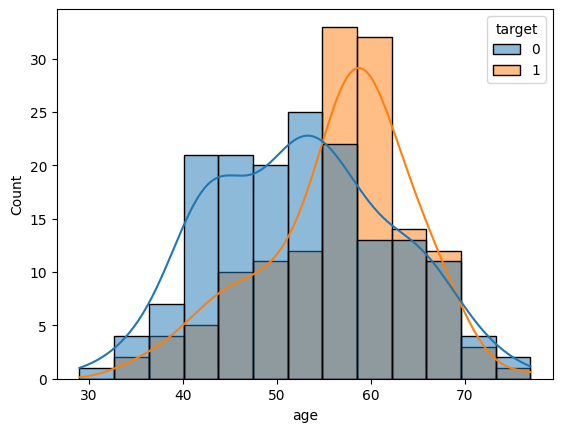

In [101]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.show()


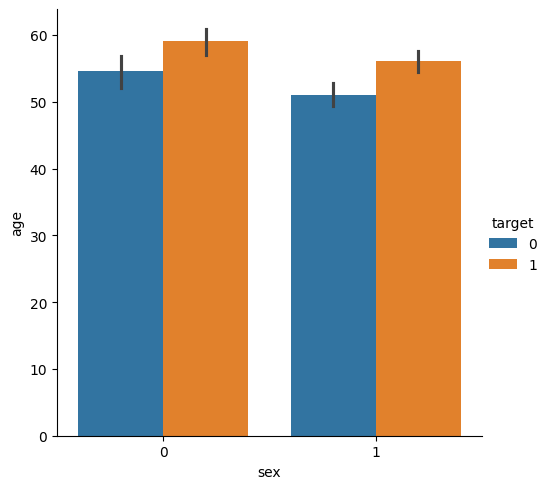

In [102]:
sns.catplot(data=df, x='sex', y='age',hue='target', kind='bar')
plt.show()


In [103]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cn_test = confusion_matrix(y_test, y_pred)

y_pred_train = knn.predict(X_train)
cn_train = confusion_matrix(y_train, y_pred_train)
# cn_test, cn_train
# print(cn_test)

# print(classification_report(y_test, y_pred))
accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

Accuracy for train: 0.76
Accuracy for test: 0.69


In [105]:
accuracy_score(y_test, y_pred)
accuracy_score(y_train, y_pred_train)

0.756198347107438

SVM

In [106]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_test, y_test)
y_pred = svc.predict(X_test)
y_pred = svc.predict(X_test)
cn_test = confusion_matrix(y_test, y_pred)

y_pred_train = svc.predict(X_train)
cn_train = confusion_matrix(y_train, y_pred_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')


Accuracy for train: 0.78
Accuracy for test: 0.93


In [107]:
accuracy_score(y_test, y_pred)
accuracy_score(y_train, y_pred_train)
print(accuracy_score(y_test, y_pred),
accuracy_score(y_train, y_pred_train))

0.9344262295081968 0.7768595041322314


Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_test, y_test)
y_pred = nb.predict(X_test)
y_pred_train = nb.predict(X_train)
cn_test = confusion_matrix(y_test, y_pred)
cn_train = confusion_matrix(y_train, y_pred_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

Accuracy for train: 0.8
Accuracy for test: 0.9


In [109]:
accuracy_score(y_test, y_pred)
accuracy_score(y_train, y_pred_train)
print(accuracy_score(y_test, y_pred),
accuracy_score(y_train, y_pred_train))

0.9016393442622951 0.7975206611570248


Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
cn_test = confusion_matrix(y_pred, y_test)
cn_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

Accuracy for train: 1.0
Accuracy for test: 0.8


In [111]:
accuracy_score(y_test, y_pred)
accuracy_score(y_train, y_pred_train)
print(accuracy_score(y_test, y_pred),
accuracy_score(y_train, y_pred_train))

0.8032786885245902 1.0


Random forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
cn_test = confusion_matrix(y_pred, y_test)
cn_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

Accuracy for train: 1.0
Accuracy for test: 0.89


In [113]:
accuracy_score(y_test, y_pred)
accuracy_score(y_train, y_pred_train)
print(accuracy_score(y_test, y_pred),
accuracy_score(y_train, y_pred_train))

0.8852459016393442 1.0


AdaBoost

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate=1, n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
y_pred_train = ada.predict(X_train)

cn_test = confusion_matrix(y_pred, y_test)
cn_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

Accuracy for train: 0.93
Accuracy for test: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GradientBoost

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

cn_test = confusion_matrix(y_pred, y_test)
cn_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

Accuracy for train: 1.0
Accuracy for test: 0.87


XGBoost

In [116]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42, n_estimator=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

cn_test = confusion_matrix(y_pred, y_test)
cn_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

Accuracy for train: 1.0
Accuracy for test: 0.87


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:17:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


Stacking

In [117]:
from sklearn.ensemble import StackingClassifier

clf = [('dt', dt), ('rf', rf), ('knn', knn), ('gc', gb), ('ada', ada), ('svc', svc) ]

stack = StackingClassifier(estimators=clf, final_estimator=xgb)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
y_pred_train = stack.predict(X_train)
cn_test = confusion_matrix(y_pred, y_test)
cn_train = confusion_matrix(y_pred_train, y_train)

accuracy_for_train = np.round(np.diagonal(cn_train).sum() / len(y_train), 2)
accuracy_for_test = np.round(np.diagonal(cn_test).sum() / len(y_test), 2)
print(f'Accuracy for train: {accuracy_for_train}')
print(f'Accuracy for test: {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for train: 0.9
Accuracy for test: 0.85


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:18:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)
